# Big Mart Sales Predicition 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Set Information

In [3]:
#Shape 
data.shape

(8523, 12)

In [4]:
#Data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Preprocessing

In [6]:
#Valeurs manquantes
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#Valeurs manquantes
missing_rate = (data.isnull().sum()/data.shape[0])*100
missing_rate

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
#remplir valeurs manquantes avec .fillna
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

In [9]:
#vérifier valeurs manquantes
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
# valeurs de la colonne Item_Fat_Content
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
# combiner (Low Fat, low fat and, LF) et (Regular and reg)
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
data[data['Item_Visibility'] == 0].value_counts().sum()

526

In [13]:
#Supprimer toutes les lignes où la visibilité est nul
data = data.loc[data['Item_Visibility'] != 0]
data[data['Item_Visibility'] == 0].value_counts().sum()

0

In [14]:
#Création d'un nouvel attribut: "Item_Type_2"
data['Item_Type_2'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['Item_Type_2'].head()

0    FD
1    DR
2    FD
6    FD
7    FD
Name: Item_Type_2, dtype: object

In [15]:
data['Item_Type_2'] = data['Item_Type_2'].map({'FD':'Food', 'NC':'Non Consumable', 'DR':'Drink'})
data['Item_Type_2'].value_counts()

Food              5759
Non Consumable    1505
Drink              733
Name: Item_Type_2, dtype: int64

In [16]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_2
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Food
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Food


## Data vizualisation

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

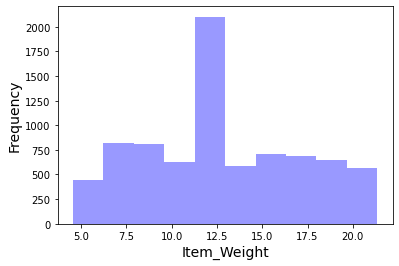

In [17]:
sns.distplot(data['Item_Weight'],kde = False,color = 'blue',bins = 10)
plt.xlabel('Item_Weight', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Text(0, 0.5, 'Frequency')

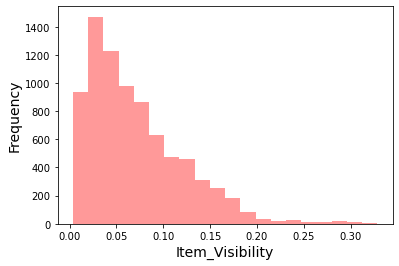

In [18]:
sns.distplot(data['Item_Visibility'],kde = False,color = 'red',bins = 20)
plt.xlabel('Item_Visibility', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Text(0, 0.5, 'Frequency')

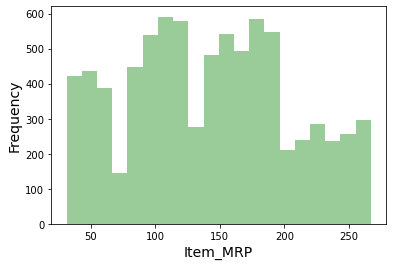

In [19]:
sns.distplot(data['Item_MRP'],kde = False,color = 'green',bins = 20)
plt.xlabel('Item_MRP', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

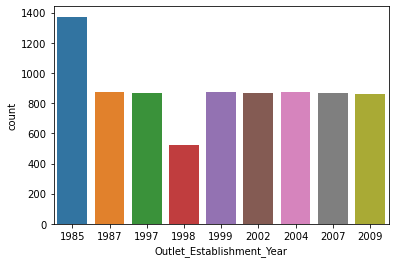

In [20]:
sns.countplot(data['Outlet_Establishment_Year'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

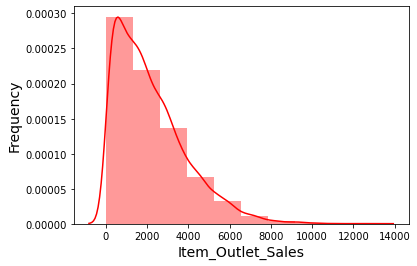

In [21]:
sns.distplot(data['Item_Outlet_Sales'],kde = True,color = 'red',bins = 10)
plt.xlabel('Item_Outlet_Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Text(0, 0.5, 'Number of Items')

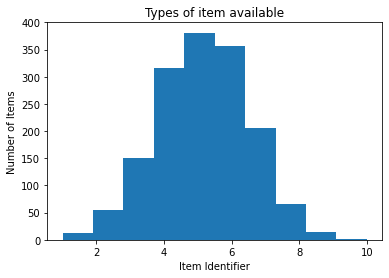

In [22]:
data['Item_Identifier'].value_counts()
data['Item_Identifier'].value_counts().plot.hist()
plt.title('Types of item available')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

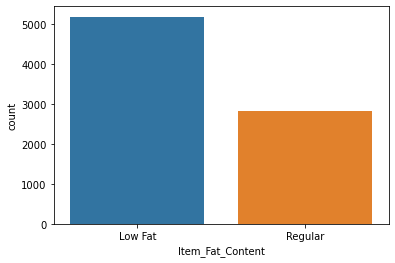

In [23]:
sns.countplot(data["Item_Fat_Content"])

Text(0, 0.5, 'Number of Items')

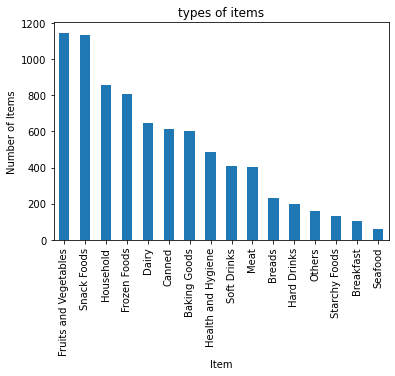

In [24]:
data['Item_Type'].value_counts().plot.bar()
plt.title('types of items')
plt.xlabel('Item')
plt.ylabel('Number of Items')

Text(0, 0.5, 'Number of Items')

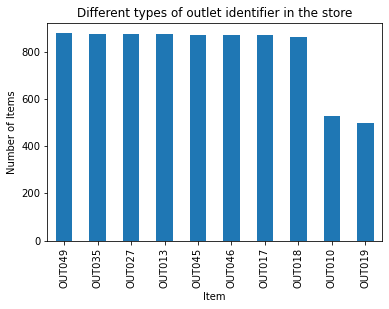

In [25]:
data['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

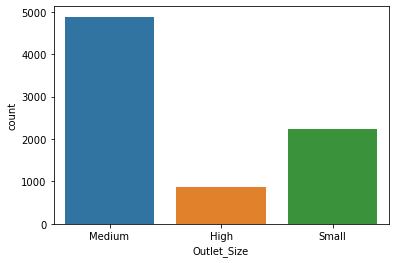

In [26]:
sns.countplot(data['Outlet_Size'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

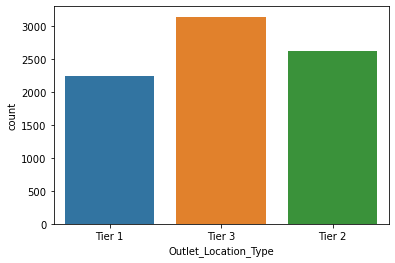

In [27]:
sns.countplot(data['Outlet_Location_Type'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

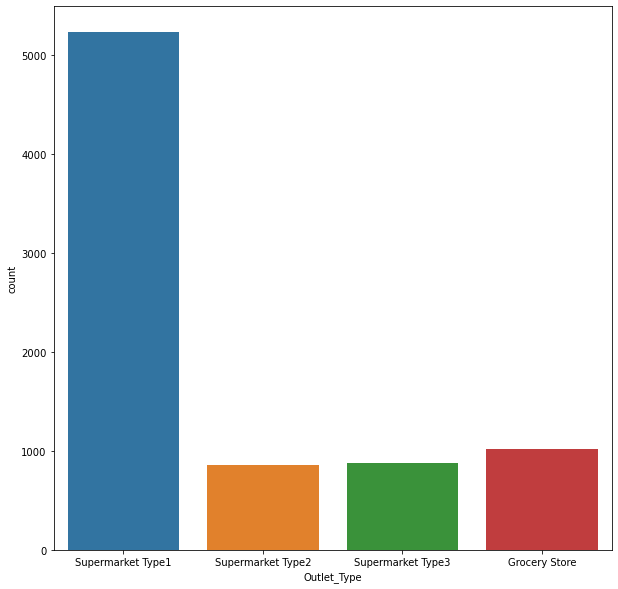

In [28]:
plt.figure(figsize = (10,10))
sns.countplot(data['Outlet_Type'])

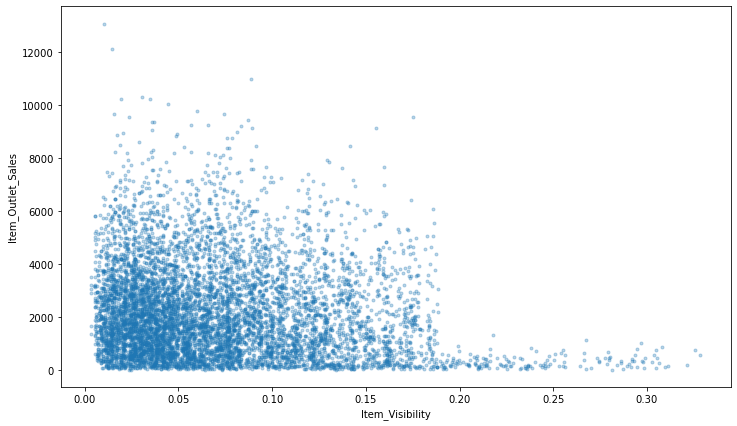

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.plot(data.Item_Visibility, data["Item_Outlet_Sales"],'.', alpha = 0.3)

### Matrice de corrélation

<AxesSubplot:>

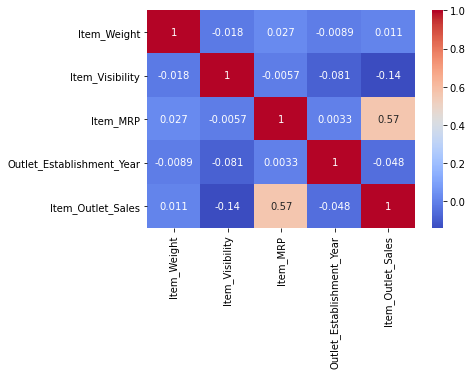

In [30]:
sns.heatmap(data.corr(),annot = True,cmap='coolwarm')

## Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1 = data.apply(LabelEncoder().fit_transform)
data1.head(n=2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_2
0,156,284,0,663,4,5366,9,4,1,0,1,2481,1
1,8,57,1,879,14,446,3,8,1,2,2,414,0


<AxesSubplot:>

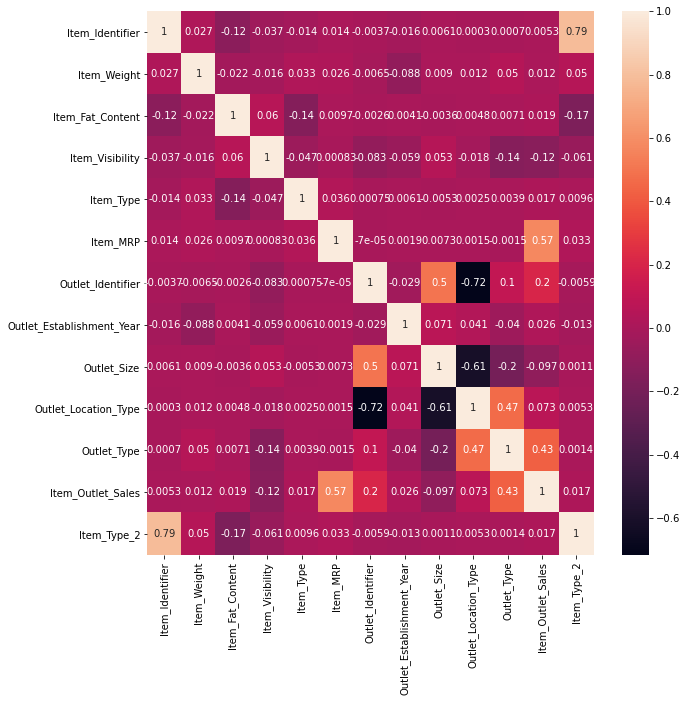

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(data1.corr(),annot = True)

## Features and target value

In [32]:
X = data1[["Item_MRP","Outlet_Identifier","Outlet_Rype"]]
y = data1['Item_Outlet_Sales']

## Spliting data

In [33]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## XGBoost

In [34]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 50,max_depth = 5,eta = 0.1,subsample = 0.71,colsample_bytree = 1)
regressor.fit(X_train,y_train)
training_data_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [36]:
from sklearn import metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [37]:
print_evaluate(y_test,test_pred)

MAE: 401.23815626621246
MSE: 275606.30635919585
RMSE: 524.9821962306872
R2 Square 0.6542572833512105
__________________________________


## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [39]:
linear.fit(X_train,y_train)
y_pred_lin = linear.predict(X_test)

In [45]:
print_evaluate(y_test,y_pred_lin)

MAE: 484.6596324035763
MSE: 365421.018723969
RMSE: 604.500635834214
R2 Square 0.5415864847100668
__________________________________


## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100,max_depth = 7,n_jobs = -1)

In [43]:
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [44]:
print_evaluate(y_test,y_pred_rfr)

MAE: 400.57945799200047
MSE: 276562.89428078005
RMSE: 525.8924740674466
R2 Square 0.6530572625276996
__________________________________


## Decision Tree

In [66]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf =  DecisionTreeClassifier()

In [67]:
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

In [68]:
print_evaluate(y_test,y_pred_clf)

MAE: 570.75375
MSE: 554525.215
RMSE: 744.6644982809372
R2 Square 0.3043589719805513
__________________________________


# Conclusion

In [69]:
conclusion = pd.read_csv('Conclusion Big Mart Sales Prediction - Feuille 1.csv')
conclusion

,Modéle,MAE,MSE,RMSE,R²
0,XGBoost,401.238156,275606.306359,524.982196,0.654257
1,Linear Regression,484.659632,365421.018724,604.500636,0.541586
2,Random Forest,400.579458,276562.894281,525.892474,0.653057
3,Decision Tree,570.753750,554525.215000,744.664498,0.304359


Text(0.5, 1.0, 'R²')

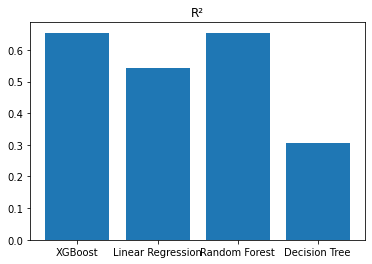

In [84]:
plt.bar(np.arange(len(conclusion['Modéle'])), conclusion['R²'])
plt.xticks(np.arange(len(conclusion['Modéle'])), conclusion['Modéle'])
plt.title('R²')

Text(0.5, 1.0, 'MAE')

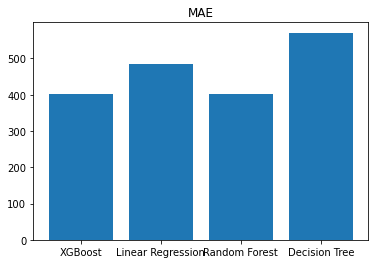

In [85]:
plt.bar(np.arange(len(conclusion['Modéle'])), conclusion['MAE'])
plt.xticks(np.arange(len(conclusion['Modéle'])), conclusion['Modéle'])
plt.title('MAE')

Text(0.5, 1.0, 'RMSE')

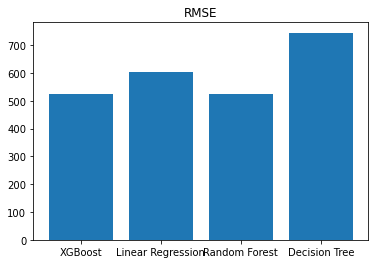

In [86]:
plt.bar(np.arange(len(conclusion['Modéle'])), conclusion['RMSE'])
plt.xticks(np.arange(len(conclusion['Modéle'])), conclusion['Modéle'])
plt.title('RMSE')

Text(0.5, 1.0, 'MSE')

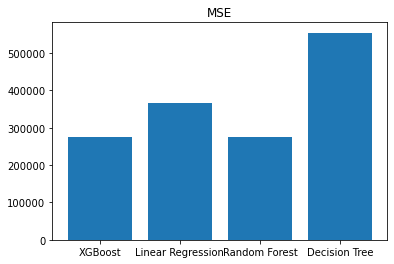

In [87]:
plt.bar(np.arange(len(conclusion['Modéle'])), conclusion['MSE'])
plt.xticks(np.arange(len(conclusion['Modéle'])), conclusion['Modéle'])
plt.title('MSE')